In [109]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sparsetools as sp
from matplotlib.colors import LogNorm
from scipy.ndimage import median_filter
plt.rcParams['figure.dpi'] = 120

In [2]:
obs = sp.profile('obs/ibis_alma6_obs.nc').extractPix(x1=320,y1=320)
mod_nlte = sp.model('nlte/nlte_mod_2_filt.nc').extract(x1=320,y1=320)
mod_alma = sp.model('alma/alma_mod_2.nc').extract(x1=320,y1=320)

profile::setsize: nx=334, ny=334, nw=94, ns=1, nt=1
profile::read: [profiles][wav][weights][pixel_weights]
profile::setsize: nx=320, ny=320, nw=94, ns=4, nt=1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::read: atmos type -> depth-stratified
model::read: nx=320, ny=320, ndep=61, nt=1
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1
model::extract: x=(0,320), y=(0,320), z=(0,61), t=(0,1)
model::setSize: nx = 320, ny = 320, ndep = 61, nt = 1


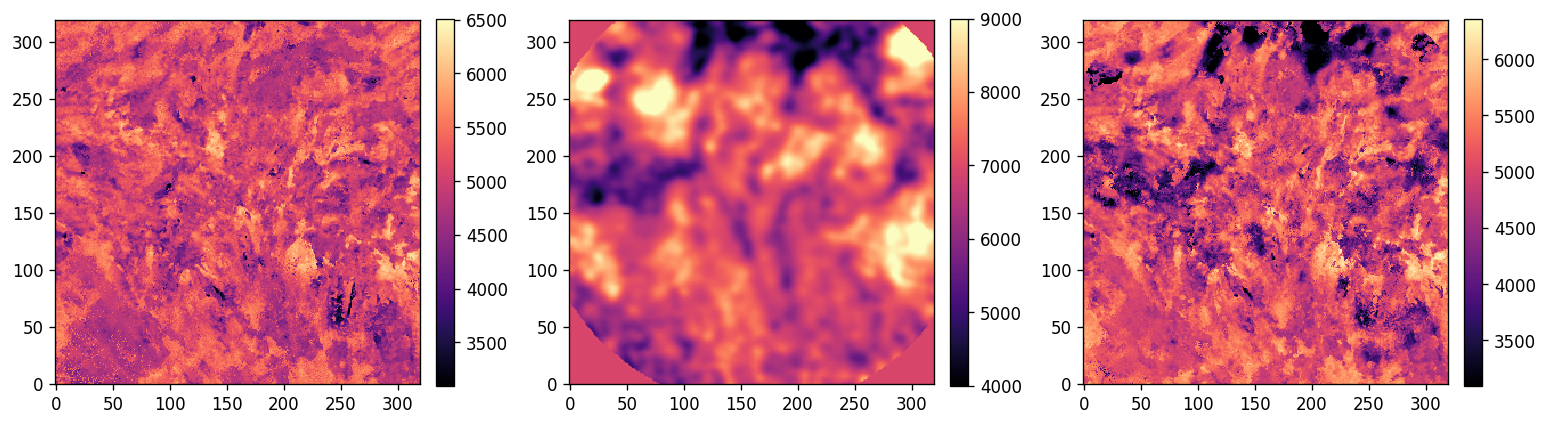

In [217]:
fig,ax = plt.subplots(1,3,figsize=(13,4))
im_obs = ax[1].imshow(obs.dat[0,:,:,-1,0]*5900,cmap='magma',origin='lower',vmin=4000,vmax=9000)
im_nlte = ax[0].imshow(mod_nlte.temp[0,:,:,24],cmap='magma',origin='lower')#,vmin=4000,vmax=9000)
im_alma = ax[2].imshow(mod_alma.temp[0,:,:,24],cmap='magma',origin='lower')#,vmin=4000,vmax=9000)
plt.colorbar(im_obs,ax=ax[1],fraction=0.046,pad=0.04)
plt.colorbar(im_nlte,ax=ax[0],fraction=0.046,pad=0.04)
plt.colorbar(im_alma,ax=ax[2],fraction=0.046,pad=0.04)
plt.tight_layout()

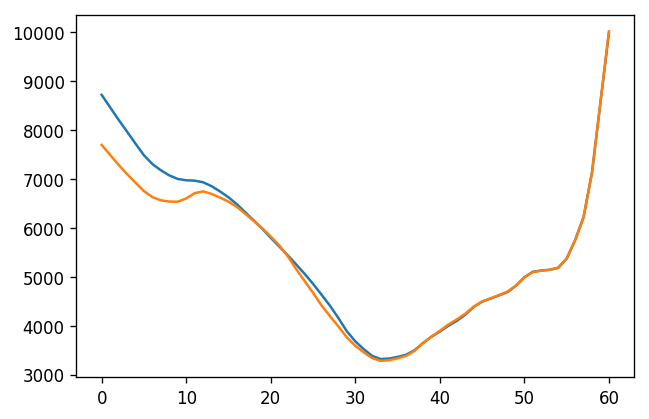

In [38]:
plt.plot(np.mean(mod_nlte.temp[0],(0,1)))
plt.plot(np.mean(mod_alma.temp[0],(0,1)))

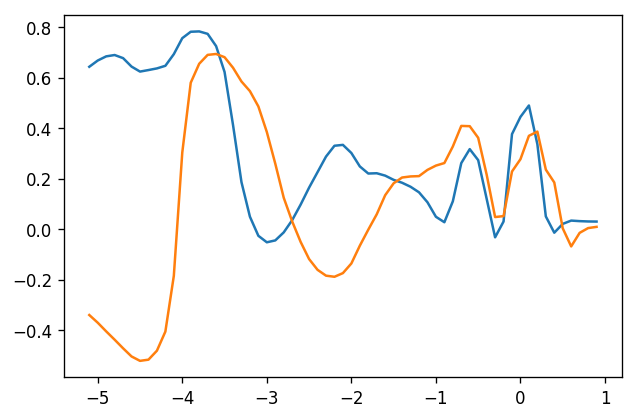

In [97]:
cor_nlte = np.zeros(61)
cor_alma = np.zeros(61)
for i in range(61):
    cor_nlte[i] = np.corrcoef(obs.dat[0,:,:,68,0].ravel(),mod_nlte.temp[0,:,:,i].ravel())[0,1]
    cor_alma[i] = np.corrcoef(obs.dat[0,:,:,68,0].ravel(),mod_alma.temp[0,:,:,i].ravel())[0,1]
plt.plot(np.arange(61)*0.1-5.1,cor_nlte)
plt.plot(np.arange(61)*0.1-5.1,cor_alma)

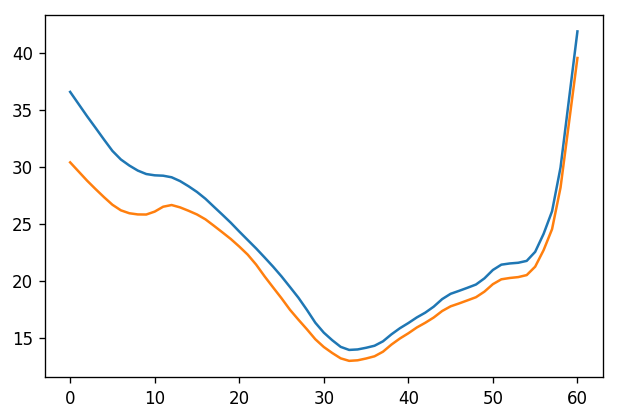

In [72]:
im_nlte = mod_nlte.temp[0]
im_alma = mod_alma.temp[0]
med_nlte = median_filter(mod_nlte.temp[0],(3,3,1))
med_alma = median_filter(mod_alma.temp[0],(3,3,1))
dif_nlte = im_nlte - med_nlte
dif_alma = im_alma - med_alma
rms_nlte = np.sqrt(np.mean(dif_nlte**2))
rms_alma = np.sqrt(np.mean(dif_alma**2))
snr_nlte = np.mean(im_nlte,(0,1)) / rms_nlte
snr_alma = np.mean(im_alma,(0,1)) / rms_alma
plt.plot(snr_nlte)
plt.plot(snr_alma)

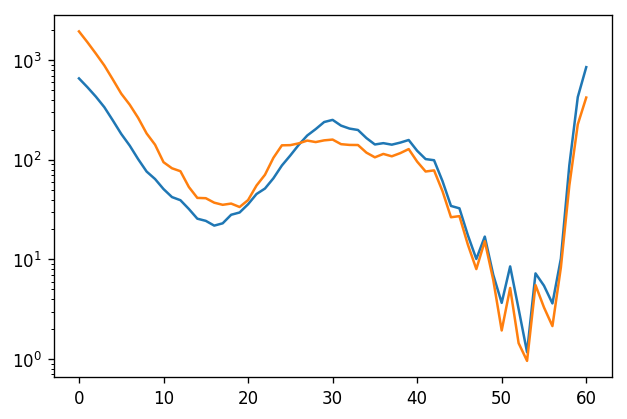

In [98]:
im_nlte = mod_nlte.temp[0]
med_nlte = median_filter(im_nlte,(3,3,1))
r_nlte = im_nlte / med_nlte
s_nlte = np.sum((r_nlte-1)**2,(0,1))
plt.plot(s_nlte)
im_alma = mod_alma.temp[0]
med_alma = median_filter(im_alma,(3,3,1))
r_alma = im_alma / med_alma
s_alma = np.sum((r_alma-1)**2,(0,1))
plt.plot(s_alma)
plt.yscale('log')

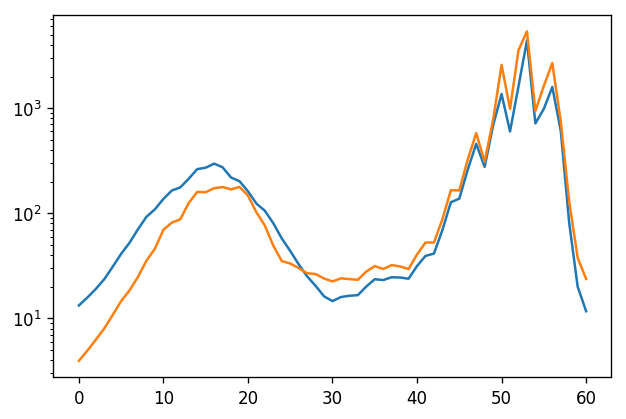

In [88]:
plt.plot(np.mean(im_nlte,(0,1))/s_nlte)
plt.plot(np.mean(im_alma,(0,1))/s_alma)
plt.yscale('log')

(array([1.0000e+01, 8.0000e+00, 7.0000e+00, 1.0000e+01, 6.0000e+00,
        5.0000e+00, 1.4000e+01, 7.0000e+00, 8.0000e+00, 1.2000e+01,
        9.0000e+00, 8.0000e+00, 1.5000e+01, 1.3000e+01, 1.3000e+01,
        2.1000e+01, 2.6000e+01, 5.0000e+01, 8.3000e+01, 9.3000e+01,
        1.1600e+02, 1.4200e+02, 1.8200e+02, 2.1600e+02, 2.1900e+02,
        2.7500e+02, 2.9500e+02, 3.1100e+02, 3.4600e+02, 4.9400e+02,
        5.3100e+02, 6.0900e+02, 6.4900e+02, 7.7700e+02, 8.9100e+02,
        9.2700e+02, 1.0260e+03, 1.2030e+03, 1.5260e+03, 1.7240e+03,
        2.0290e+03, 2.5030e+03, 2.6270e+03, 2.9320e+03, 3.5980e+03,
        4.4970e+03, 5.3540e+03, 6.1600e+03, 1.1749e+04, 6.8540e+03,
        5.6990e+03, 5.0140e+03, 4.2550e+03, 3.8470e+03, 3.3540e+03,
        2.6570e+03, 2.3200e+03, 2.2670e+03, 1.8840e+03, 1.5820e+03,
        1.3230e+03, 1.0290e+03, 8.5600e+02, 7.7400e+02, 6.7600e+02,
        5.5700e+02, 5.3800e+02, 4.3300e+02, 3.7900e+02, 2.3100e+02,
        2.0200e+02, 2.1700e+02, 1.8600e+02, 1.32

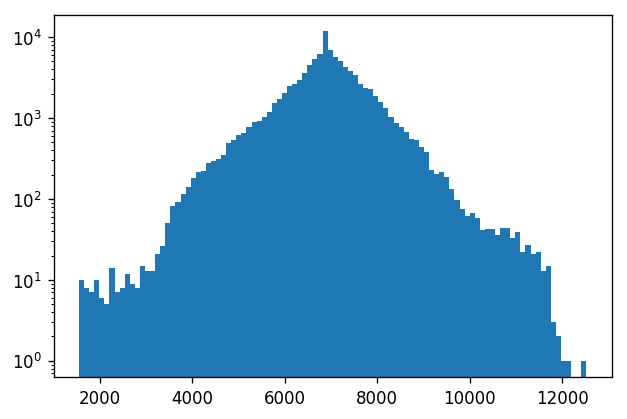

In [110]:
plt.hist(obs.dat[0,:,:,-1,0].ravel()*5900,bins=100,log=True)

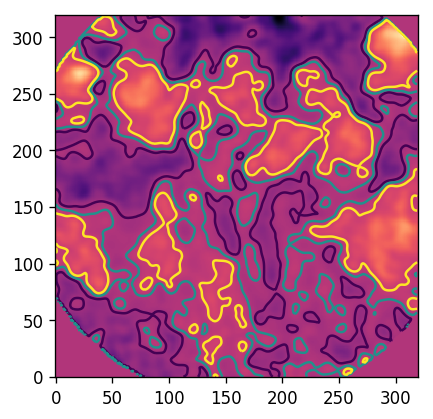

In [224]:
thres = 7000
buffer = 500
plt.imshow(obs.dat[0,:,:,-1,0]*5900,cmap='magma',origin='lower')
plt.contour(obs.dat[0,:,:,-1,0]*5900,[thres-buffer,thres,thres+buffer])

In [225]:
warm = np.where(obs.dat[0,:,:,-1,0].ravel()*5900>thres+buffer)[0]
cool = np.where(obs.dat[0,:,:,-1,0].ravel()*5900<thres-buffer)[0]

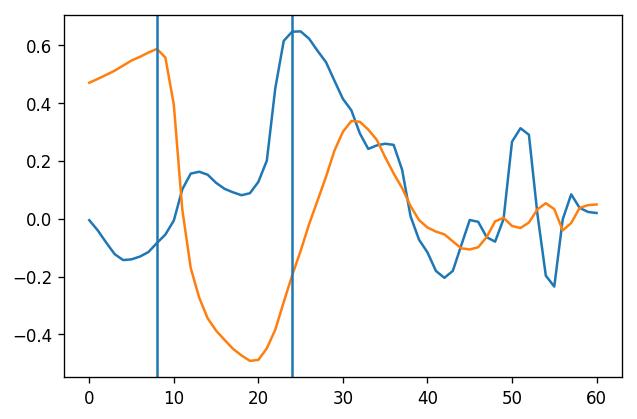

In [226]:
cor_warm = np.zeros(61)
cor_cool = np.zeros(61)
for i in range(61):
    cor_warm[i] = np.corrcoef(obs.dat[0,:,:,-1,0].ravel()[warm],mod_alma.temp[0,:,:,i].ravel()[warm])[0,1]
    cor_cool[i] = np.corrcoef(obs.dat[0,:,:,-1,0].ravel()[cool],mod_alma.temp[0,:,:,i].ravel()[cool])[0,1]
plt.plot(cor_cool)
plt.plot(cor_warm)
max_c = np.argmax(cor_cool)
max_w = np.argmax(cor_warm)
plt.axvline(8)
plt.axvline(24)

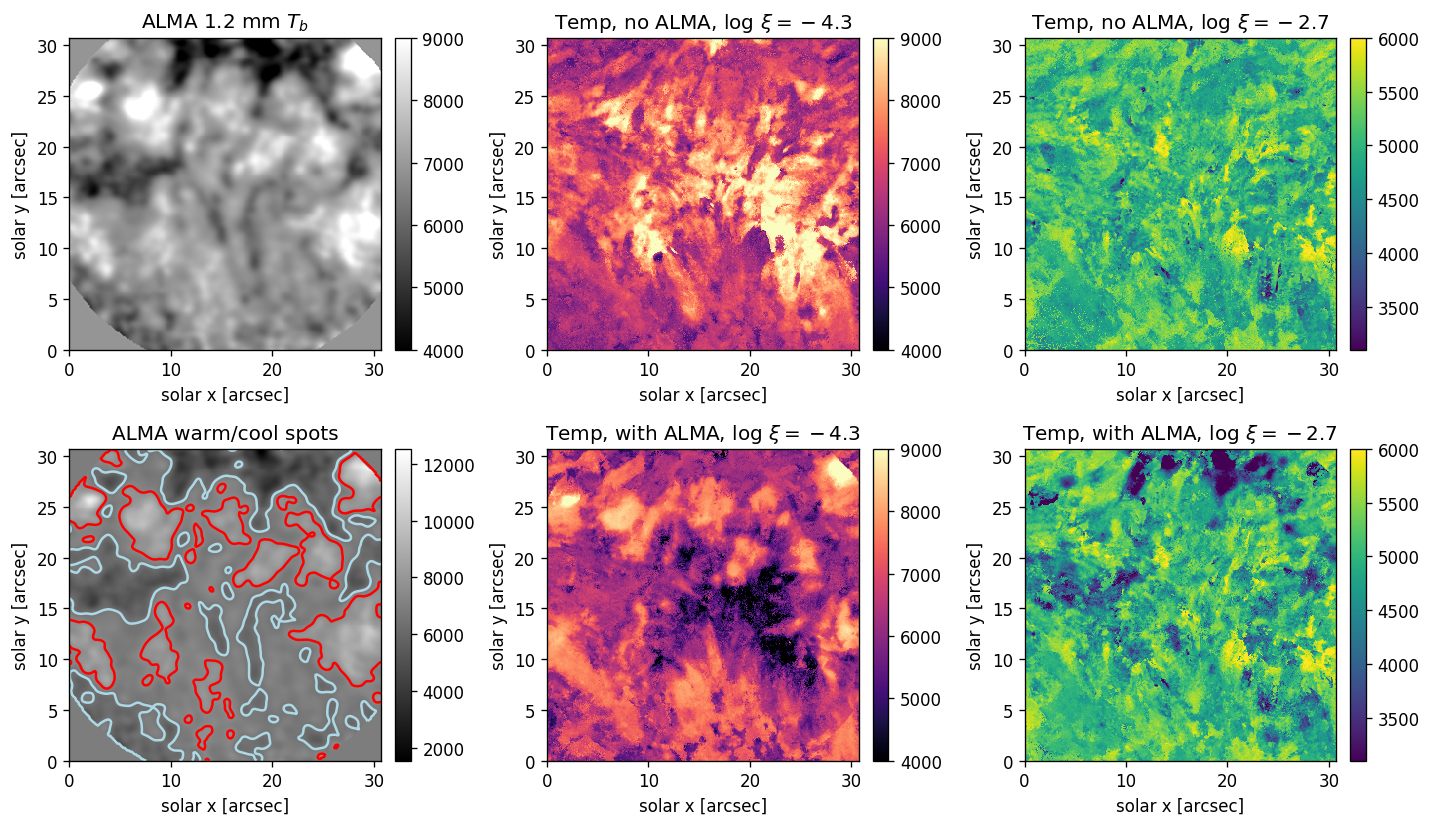

In [244]:
fig,ax = plt.subplots(2,3,figsize=(12,7))
dim = 320*0.096
im00 = ax[0,0].imshow(obs.dat[0,:,:,-1,0]*5900,extent=[0,dim,0,dim],\
               cmap='gist_gray',origin='lower',vmin=4000,vmax=9000)
im10 = ax[1,0].imshow(obs.dat[0,:,:,-1,0]*5900,extent=[0,dim,0,dim],\
               cmap='gist_gray',origin='lower')
ax[1,0].contour(obs.dat[0,:,:,-1,0]*5900,[thres-buffer,thres+buffer],\
                extent=[0,dim,0,dim],colors=['lightblue','red'])
im01 = ax[0,1].imshow(mod_nlte.temp[0,:,:,8],extent=[0,dim,0,dim],\
               cmap='magma',origin='lower',vmin=4000,vmax=9000)
im11 = ax[1,1].imshow(mod_alma.temp[0,:,:,8],extent=[0,dim,0,dim],\
               cmap='magma',origin='lower',vmin=4000,vmax=9000)
im02 = ax[0,2].imshow(mod_nlte.temp[0,:,:,24],extent=[0,dim,0,dim],\
               cmap='viridis',origin='lower',vmin=3100,vmax=6000)
im12 = ax[1,2].imshow(mod_alma.temp[0,:,:,24],extent=[0,dim,0,dim],\
               cmap='viridis',origin='lower',vmin=3100,vmax=6000)
plt.colorbar(im00,ax=ax[0,0],fraction=0.046,pad=0.04)
plt.colorbar(im10,ax=ax[1,0],fraction=0.046,pad=0.04)
plt.colorbar(im01,ax=ax[0,1],fraction=0.046,pad=0.04)
plt.colorbar(im11,ax=ax[1,1],fraction=0.046,pad=0.04)
plt.colorbar(im02,ax=ax[0,2],fraction=0.046,pad=0.04)
plt.colorbar(im12,ax=ax[1,2],fraction=0.046,pad=0.04)
for i in range(2):
    for j in range(3):
        ax[i,j].set_xlabel('solar x [arcsec]')
        ax[i,j].set_ylabel('solar y [arcsec]')
ax[0,0].set_title(r'ALMA 1.2 mm $T_b$')
ax[1,0].set_title(r'ALMA warm/cool spots')
ax[0,1].set_title(r'Temp, no ALMA, $\log\ \xi = -4.3$')
ax[1,1].set_title(r'Temp, with ALMA, $\log\ \xi = -4.3$')
ax[0,2].set_title(r'Temp, no ALMA, $\log\ \xi = -2.7$')
ax[1,2].set_title(r'Temp, with ALMA, $\log\ \xi = -2.7$')
plt.tight_layout()